Example: using Pandas to explore Kepler data
------------

The Kepler probe observed a patch of sky for four years looking for transit signals, evidence of planets slightly dimming these stars by passing between us and the star on their orbit.

The following example fetches the KOI (Kepler Object of Interest) table. Each row is a star that showed periodic dimming consistent with a planet in orbit around the star. However, we expect that there are a lot of false positives, so not every row corresponds to a real planet.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#koi = pd.read_csv('http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative')
koi = pd.read_excel('planets.xls')

In [3]:
koi.describe()

,kepid,kepid.1,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag,koi_kepmag_err
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007,1007.000000,1.005000e+03,1.005000e+03,1007.000000,...,1005.000000,991.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1007.000000,0
mean,8003087.661370,8003087.661370,0.001986,0.012910,0.002979,0,27.022036,1.659325e-04,-1.659325e-04,159.967554,...,145.529353,-146.980827,4.444605,0.074669,-0.192231,1.033973,0.316626,-0.121223,14.127699,NaN
std,2536653.270967,2536653.270967,0.044543,0.112941,0.054527,0,60.547180,6.905820e-04,6.905820e-04,45.459765,...,66.463799,59.841682,0.247548,0.073492,0.132402,0.912337,0.364489,0.166372,1.399496,NaN
min,757450.000000,757450.000000,0.000000,0.000000,0.000000,0,0.453287,1.900000e-08,-1.149000e-02,120.565925,...,44.000000,-798.000000,1.857000,0.006000,-0.835000,0.170000,0.018000,-1.909000,8.224000,NaN
25%,6037581.000000,6037581.000000,0.000000,0.000000,0.000000,0,6.160237,1.160000e-05,-1.053000e-04,135.093875,...,107.000000,-183.000000,4.361000,0.032000,-0.285000,0.790000,0.077000,-0.121000,13.448000,NaN
50%,8226994.000000,8226994.000000,0.000000,0.000000,0.000000,0,12.283000,3.513000e-05,-3.513000e-05,143.415180,...,157.000000,-142.000000,4.479000,0.055000,-0.178000,0.937000,0.280000,-0.079000,14.290000,NaN
75%,10028057.500000,10028057.500000,0.000000,0.000000,0.000000,0,25.848260,1.053000e-04,-1.160000e-05,172.158495,...,168.000000,-109.000000,4.574000,0.091000,-0.080000,1.108000,0.406000,-0.060000,15.204000,NaN
max,12735740.000000,12735740.000000,1.000000,1.000000,1.000000,0,1071.231935,1.149000e-02,-1.900000e-08,589.718140,...,1067.000000,-44.000000,5.113000,0.656000,-0.006000,18.939000,5.890000,-0.018000,17.475000,NaN


In [4]:
koi.kepid

0       10797460
1       10797460
2       10872983
3       10872983
4       10872983
5       10910878
6       11446443
7       10666592
8        6922244
9       10601284
10      10601284
11      10601284
12      10910878
13      10910878
14      11018648
15      11018648
16       9579641
17      12366084
18      12366084
19       8395660
20       9579641
21      11754553
22      11754553
23      11754553
24      12066335
25      12066335
26       8395660
27       3342970
28       3342970
29      12470844
          ...   
977      6975129
978      9529744
979     10328393
980     11521793
981      7703955
982      6696580
983      5384079
984     11709124
985      9892816
986      6949061
987     10328393
988      5437945
989      9101496
990     11450414
991      5202905
992     12735740
993     11358389
994      8142787
995      9904006
996     10404582
997      4570949
998     11497958
999     11442793
1000    11442793
1001    11442793
1002     9002278
1003     6026438
1004     87538

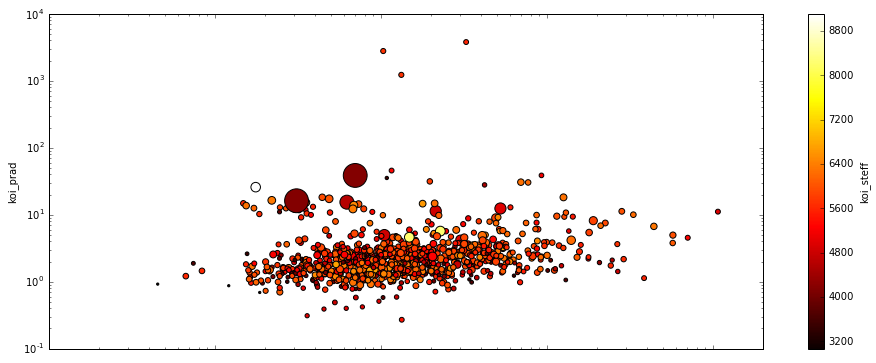

In [5]:
ax = koi.plot(x='koi_period', y='koi_prad', c='koi_steff', s=koi['koi_srad']*30, colormap=plt.cm.hot, kind='scatter', 
              figsize=(16,6), xlim=(0.1,2000), loglog=True)

In [6]:
koi['koi_steff'].describe()

count    1005.000000
mean     5506.090547
std       776.043366
min      3068.000000
25%      5195.000000
50%      5741.000000
75%      6028.000000
max      9107.000000
Name: koi_steff, dtype: float64

In [7]:
koi['koi_srad'].describe()

count    1005.000000
mean        1.033973
std         0.912337
min         0.170000
25%         0.790000
50%         0.937000
75%         1.108000
max        18.939000
Name: koi_srad, dtype: float64

In [8]:
koi.index = koi['kepid']

In [9]:
koi.iloc[42]

kepid                        5358241
kepid.1                      5358241
kepoi_name                 K00829.02
kepler_name              Kepler-53 d
koi_disposition            CONFIRMED
koi_pdisposition           CANDIDATE
koi_fpflag_nt                      0
koi_fpflag_ss                      0
koi_fpflag_co                      0
koi_fpflag_ec                      0
koi_period                   9.75193
koi_period_err1            4.586e-05
koi_period_err2           -4.586e-05
koi_time0bk                  138.787
koi_time0bk_err1             0.00345
koi_time0bk_err2            -0.00345
koi_impact                    0.9349
koi_impact_err1               0.0268
koi_impact_err2              -0.6387
koi_duration                   4.575
koi_duration_err1              0.128
koi_duration_err2             -0.128
koi_depth                      440.6
koi_depth_err1                  16.7
koi_depth_err2                 -16.7
koi_prad                        2.44
koi_prad_err1                   0.94
k

In [10]:
koi.loc[5358241]

,kepid,kepid.1,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
5358241,5358241,5358241,K00829.01,Kepler-53 b,CONFIRMED,CANDIDATE,0,0,0,0,...,4.495,0.045,-0.284,0.945,0.364,-0.088,19h21m50.82s,+40d33m44.9s,15.386,NaN
5358241,5358241,5358241,K00829.02,Kepler-53 d,CONFIRMED,CANDIDATE,0,0,0,0,...,4.495,0.045,-0.284,0.945,0.364,-0.088,19h21m50.82s,+40d33m44.9s,15.386,NaN
5358241,5358241,5358241,K00829.03,Kepler-53 c,CONFIRMED,CANDIDATE,0,0,0,0,...,4.495,0.045,-0.284,0.945,0.364,-0.088,19h21m50.82s,+40d33m44.9s,15.386,NaN


In [11]:
koi.kepler_name.isnull()

kepid
10797460    False
10797460    False
10872983    False
10872983    False
10872983    False
10910878    False
11446443    False
10666592    False
6922244     False
10601284    False
10601284    False
10601284    False
10910878    False
10910878    False
11018648    False
11018648    False
9579641     False
12366084    False
12366084    False
8395660     False
9579641     False
11754553    False
11754553    False
11754553    False
12066335    False
12066335    False
8395660     False
3342970     False
3342970     False
12470844    False
            ...  
6975129     False
9529744     False
10328393    False
11521793    False
7703955     False
6696580     False
5384079     False
11709124    False
9892816     False
6949061     False
10328393    False
5437945     False
9101496     False
11450414    False
5202905     False
12735740    False
11358389    False
8142787     False
9904006     False
10404582    False
4570949     False
11497958    False
11442793    False
11442793    False
1144

In [12]:
output = koi.ix[koi.kepler_name.isnull() == False]

In [13]:
output

,kepid,kepid.1,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,10797460,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,0,0,0,0,...,4.426,0.068,-0.296,1.040,0.465,-0.114,19h27m44.22s,+48d08m29.9s,15.347,NaN
10797460,10797460,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0,0,0,0,...,4.426,0.068,-0.296,1.040,0.465,-0.114,19h27m44.22s,+48d08m29.9s,15.347,NaN
10872983,10872983,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,0,0,0,0,...,4.486,0.045,-0.302,0.972,0.414,-0.090,19h45m08.67s,+48d13m28.8s,15.714,NaN
10872983,10872983,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,0,0,0,0,...,4.486,0.045,-0.302,0.972,0.414,-0.090,19h45m08.67s,+48d13m28.8s,15.714,NaN
10872983,10872983,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0,0,0,0,...,4.486,0.045,-0.302,0.972,0.414,-0.090,19h45m08.67s,+48d13m28.8s,15.714,NaN
10910878,10910878,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,0,0,0,0,...,4.609,0.027,-0.106,0.742,0.125,-0.055,19h07m59.88s,+48d22m32.8s,15.841,NaN
11446443,11446443,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0,0,0,0,...,4.455,0.025,-0.025,0.950,0.020,-0.020,19h07m14.03s,+49d18m59.0s,11.338,NaN
10666592,10666592,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,0,1,0,0,...,4.021,0.011,-0.011,1.991,0.018,-0.018,19h28m59.35s,+47d58m10.3s,10.463,NaN
6922244,6922244,6922244,K00010.01,Kepler-8 b,CONFIRMED,CANDIDATE,0,0,0,0,...,4.169,0.055,-0.048,1.451,0.117,-0.129,18h45m09.15s,+42d27m03.9s,13.563,NaN


In [14]:
output.to_excel('planets.xls')